In [66]:
import os
import subprocess
import ee
import geemap
import glob
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

In [9]:
def download_corine_data(year,output_dir):
    data_path=os.path.join('COPERNICUS/Landcover/100m/Proba-V-C3/Global',str(y))
    dataset = ee.Image(data_path)
    landcover = ee.Image(dataset.select('discrete_classification'))
    states = ee.FeatureCollection("users/giswqs/public/countries")
    nlcd_stats=os.path.join(output_dir,str(year)+'.csv')
    
    geemap.zonal_statistics_by_group(
    landcover,
    states,
    nlcd_stats,
    statistics_type='PERCENTAGE',
    denominator=1000000,
    decimal_places=2,
)
    


In [11]:
out_dir='/home/pedrozamboni/Documentos/doutorado/dataset/corine/corine_data'

year_list=[2015,2016,2017,2018,2019]
for y in year_list:
    download_corine_data(y,out_dir)
    

Computing ... 
Generating URL ...
Please wait ...
Data downloaded to /home/pedrozamboni/Documentos/doutorado/dataset/corine/corine_data/2015.csv
Computing ... 
Generating URL ...
Please wait ...
Data downloaded to /home/pedrozamboni/Documentos/doutorado/dataset/corine/corine_data/2016.csv
Computing ... 
Generating URL ...
Please wait ...
Data downloaded to /home/pedrozamboni/Documentos/doutorado/dataset/corine/corine_data/2017.csv
Computing ... 
Generating URL ...
Please wait ...
Data downloaded to /home/pedrozamboni/Documentos/doutorado/dataset/corine/corine_data/2018.csv
Computing ... 
Generating URL ...
Please wait ...
Data downloaded to /home/pedrozamboni/Documentos/doutorado/dataset/corine/corine_data/2019.csv


In [14]:
path='/home/pedrozamboni/Documentos/doutorado/dataset/corine/Production_Crops_Livestock_E_All_Data/Production_Crops_Livestock_E_All_Data.csv'

In [15]:
df = pd.read_csv(path,
                  encoding="ISO-8859-1")

In [262]:
df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

In [28]:
sorted(df['Item'].unique())

['Agave fibres nes',
 'Almonds, with shell',
 'Anise, badian, fennel, coriander',
 'Apples',
 'Apricots',
 'Areca nuts',
 'Artichokes',
 'Asparagus',
 'Asses',
 'Avocados',
 'Bambara beans',
 'Bananas',
 'Barley',
 'Bastfibres, other',
 'Beans, dry',
 'Beans, green',
 'Beef and Buffalo Meat',
 'Beehives',
 'Beer of barley',
 'Beeswax',
 'Berries nes',
 'Blueberries',
 'Brazil nuts, with shell',
 'Broad beans, horse beans, dry',
 'Buckwheat',
 'Buffaloes',
 'Butter and Ghee',
 'Butter and ghee, sheep milk',
 'Butter, buffalo milk',
 'Butter, cow milk',
 'Butter, goat milk',
 'Cabbages and other brassicas',
 'Camelids, other',
 'Camels',
 'Canary seed',
 'Carobs',
 'Carrots and turnips',
 'Cashew nuts, with shell',
 'Cashewapple',
 'Cassava',
 'Cassava leaves',
 'Castor oil seed',
 'Cattle',
 'Cattle and Buffaloes',
 'Cauliflowers and broccoli',
 'Cereals nes',
 'Cereals, Total',
 'Cheese (All Kinds)',
 'Cheese, buffalo milk',
 'Cheese, goat milk',
 'Cheese, sheep milk',
 'Cheese, skimme

In [303]:
df['Element'].unique()

array(['Area harvested', 'Yield', 'Production', 'Stocks', 'Laying',
       'Producing Animals/Slaughtered', 'Yield/Carcass Weight',
       'Milk Animals', 'Prod Popultn'], dtype=object)

In [279]:
def get_data(df,item,element,aux=True):
    
    ano_int = lambda x: int(x.replace('Y',''))
    ano_int_2 = lambda x: int(x.replace('Y','').replace('F',''))
   
    if aux is True:
        df= df[(df['Item']==item) & (df['Element']==element)].drop(['Item','Area Code','Item Code','Element Code','Element','Unit'],axis=1)
        df=df.rename({'Area':'delete'}, axis=1).T
        df.columns=df.iloc[0]
        df=df.reset_index()
        df=df[1:]
        df=df.iloc[::2]
        df['ano']=df['index'].map(ano_int)
        df=df.drop('index',axis=1).apply(pd.to_numeric)

        return df
    else:
        df= df[(df['Item']==item) & (df['Element']==element)].drop(['Item','Area Code','Item Code','Element Code','Element','Unit'],axis=1)
        df=df.rename({'Area':'delete'}, axis=1).T
        df.columns=df.iloc[0]
        df=df.reset_index()
        df=df[1:]
        df=df.iloc[1::2]
        df['ano']=df['index'].map(ano_int_2)
        df=df.drop('index',axis=1).apply(pd.to_numeric)
        return df
        

In [309]:
df_2=get_data(df,'Soybeans','Area harvested')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 1 to 119
Columns: 150 entries, Albania to ano
dtypes: float64(149), int64(1)
memory usage: 70.4 KB


In [316]:
df_2.head()

delete,Albania,Angola,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belize,Benin,Bhutan,...,Western Europe,Oceania,Australia and New Zealand,European Union (27),Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries,ano
1,NaN,NaN,980.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,300.0,300.0,14260.0,48227.0,12940.0,1475.0,371971.0,50267.0,1961
3,NaN,NaN,9649.0,336.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,336.0,336.0,16433.0,57804.0,13214.0,1479.0,377994.0,59844.0,1962
5,NaN,NaN,19302.0,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1002.0,1002.0,12942.0,63499.0,13745.0,1464.0,397995.0,65539.0,1963
7,NaN,NaN,12220.0,1673.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1673.0,1673.0,7553.0,54862.0,18195.0,1499.0,405945.0,57002.0,1964
9,NaN,NaN,16422.0,1837.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1837.0,1837.0,7809.0,48255.0,23014.0,1458.0,421864.0,49890.0,1965


In [314]:
pd.DataFrame(df_2.sum()).reset_index().rename({'delete':'pais',0:'x'},axis=1).sort_values(by=['x'],ascending=False).head(20)

,pais,x
119,World,3.928905e+09
126,Americas,2.895776e+09
127,Northern America,1.548210e+09
110,United States of America,1.498699e+09
129,South America,1.335274e+09
130,Asia,8.660162e+08
12,Brazil,7.907643e+08
132,Eastern Asia,5.294238e+08
20,China,4.940737e+08
21,"China, mainland",4.931133e+08


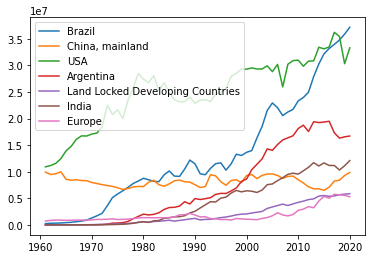

In [315]:
plt.plot(df_2['ano'],df_2['Brazil'],label='Brazil')
plt.plot(df_2['ano'],df_2['China, mainland'],label='China, mainland')
plt.plot(df_2['ano'],df_2['United States of America'],label='USA')
plt.plot(df_2['ano'],df_2['Argentina'],label='Argentina')
plt.plot(df_2['ano'],df_2['Land Locked Developing Countries'],label='Land Locked Developing Countries')
plt.plot(df_2['ano'],df_2['India'],label='India')
plt.plot(df_2['ano'],df_2['Europe'],label='Europe')
plt.legend()

In [327]:
diff=[]
for i in range(1,120,2):
    if i in range(119):
        diff.append(df_2['Brazil'][i+2]-df_2['Brazil'][i])

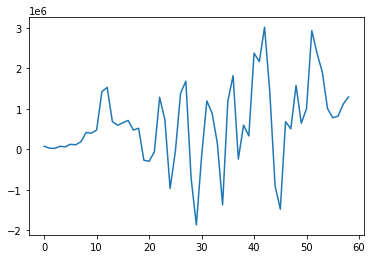

In [332]:
plt.plot(diff)